<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/stats_textbook_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 일반선형모

## 6.1 여러 가지 확률분포

### 6.1.2 이항분포

**이항분포**는 성공확률이 p면서 N회의 독립 베르누이 시행을 했을 때 성공한 횟수 m이 따르는 이산형 확률분포

이항분포는 Binomial distribution의 약자를 취해 Bin으로 표시

- $Bin(m | N, p) = _nC_m \cdot p^m \cdot (1-p)^{N-m}$
- $_NC_m = \dfrac {N!} {(N-m)! \cdot m!}$
- p : 성공확률
- N : 시행횟수
- m : 성공횟수 

### 6.1.5 분석준비 (이항분포)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

### 6.1.6 이항분포(실습)

[2 3 0 1 1]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


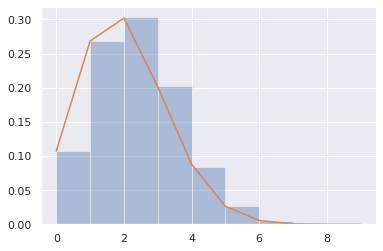

In [2]:
# pmf : Probability Mass Function (확률질량함수)
# 앞이 나올 확률이 50%인 동전을 2번 던져서 그중 1번 앞면이 나올 확률
sp.stats.binom.pmf(k=1, n=2, p=0.5)

np.random.seed(1)

# 난수생성함수 : rvs
# 앞이 나올 확률 20%, 10번 던져 앞이 나온 수를 세는 시행을 5회 반복
print(sp.stats.binom.rvs(n=10, p=0.2, size=5))

# N=10, p=0.2 인 이항분포
binomial = sp.stats.binom(n=10, p=0.2)

# 난수 10,000개
rvs_binomial = binomial.rvs(size=10_000)

# 확률밀도함수
m = np.arange(0, 10, 1)
pmf_binomial = binomial.pmf(k=m)

# 난수의 히스토그램과 확률질량함수를 겹처서 그리기
sns.distplot(rvs_binomial, bins=m, kde=False,
             norm_hist=True)
plt.plot(m, pmf_binomial)


### 6.1.7 푸아송 분포

**푸아송분포**는 1개 또는 2개, 1회 또는 2회 등의 **카운트 데이터**가 따르는 이산형 확률분포입니다.

카운트 데이터는 0 이상의 정수라는 특징이 있음

푸아송 분포의 모수는 **강도**(일이 일어난 횟수에 대한 기댓값, 발생 강도) &lambda; 밖에 없습니다.

푸아송 분포를 따르는 확률변수는 기댓값과 분산도 &lambda; 값과 같습니다.


사용 예
- 낚싯대를 바꾸면 잡아 올리는 물고기 수가 달라지는지
- 주변 환경에 따라 조사 구획내의 생물의 개체수가 변하는지
- 날씨에 따라 상품의 판매 개수가 얼마나 달라지는지

### 6.1.9 푸아송 분포의 확률질량함수

$Pois(x | \lambda) = \dfrac {e^{-\lambda}\lambda^x} {x!}$

- x : 카운트 데이터 등 이산형 확률변수
- &lambda; : 푸아송 분포의 강도

### 6.1.10 이항분포와 푸아송분포의 관계

푸아송 분포는 $p \to 0, N \to \infty $라는 조건에서 이항분포가 $Np = \lambda$ 인 결과라고 볼 수 있음

문장으로 풀어 쓰면 '성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포' 임

예) 교통사고 사상자수라는 카운트 데이터가 있다고 하면, 사고에 휘말릴 가능성이 있는 사람 수는 길을 걷고 있는 모든 사람 수라는 것이 되므로 `N`은 매우 큰 값이 됨. 한편 사고에 휘말릴 확률 `p`는 매우 작을 것임. 일어나기 어려운 사건 (p -> 0) 이지만 대상이 되는 사람 수가 굉장히 많을 때 (N -> 무한)의 발생건수가 푸아송 분포를 따르는 것이 됨.

### 6.1.11 푸아송 분포 실습

In [3]:
sp.stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [4]:
# 강도가 2인 푸아송 분포를 따르는 난수는 다음과 같이 얻을 수 있음
np.random.seed(1)
sp.stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


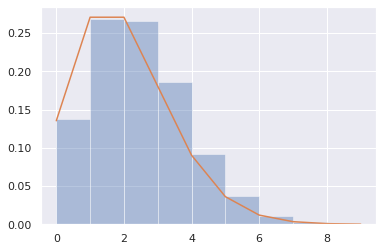

In [5]:
# 람다=2 인 푸아송 분포
poisson = sp.stats.poisson(mu=2)

rvs_poisson = poisson.rvs(size=10_000)

# 확률질량함수
m = np.arange(0, 10, 1)
pmf_poisson = poisson.pmf(k=m)

# 난수의 히스토그램과 확률질량함수 겹쳐 그리기
sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True) # 난수의 히스토그램
plt.plot(m, pmf_poisson) # 확률질량함수

푸아송 분포와 이항분포의 관계를 확인하겠음

시행횟수를 100,000,000회, 성공확률을 0.00000002로 한 이항분포의 확률질량함수를 강도 2인 푸아송 분포의 확률질량함수와 비교

이 둘은 거의 일치

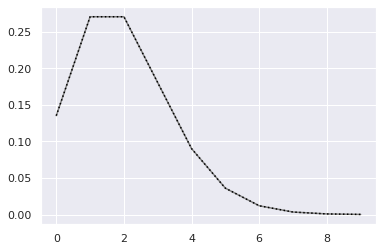

In [6]:
# N이 크고 p가 작은 이항분포
N = 100_000_000
p = 0.000_000_02
m = np.arange(0, 10, 1)

binomial_2 = sp.stats.binom(n=N, p=p)

# 확률질량함수
pmf_binomial_2 = binomial_2.pmf(k=m)

# 확률질량의 그래프
plt.plot(m, pmf_poisson, color='gray')
plt.plot(m, pmf_binomial_2, color='black', linestyle='dotted')

### 6.1.12 그 외의 확률분

`statsmodels`에서 모델링 가능한 확률분포는

- 정규분포
- 이항분포
- 푸아송분포
- 음이항분포 : 푸아송분포와 마찬가지로 카운트 데이터가 따르는 확률분포. 푸아송 보다 분산이 큰것이 특징. 과분산 이슈.
- 감마분포 : 0 이상의 값을 취하는 연속형 확률변수가 따르는 확률분포

## 6.2 일반선형모델의 기본 (GLM; Generalized Linear Models)

### 6.2.1 일반선형모델의 구성요소

- 모집단이 따르는 확률분포
- 선형예측자 : 독립변수를 선형의 관계식으로 표현한 것 (a + b*기온)
- 링크함수 : 종속변수와 선형예측자를 서로 대응시키기 위해 사용. 종속변수에 링크함수를 적용함

### 6.2.5 링크함수와 확률분포의 대응

|  확률분포  | 링크함수 |    모델명     |
| :--------: | :------: | :-----------: |
|  정규분포  | 항등함수 | 정규선형모델  |
|  이항분포  | 로짓함수 | 로지스틱 회귀 |
| 푸아송분포 | 로그함수 |  푸아송 회귀  |


- 항등함수 : f(x) = x 가 되는 함수. 아무런 변환도 하지 않는 함수

### 6.2.7 일반선형모델을 이용한 검정방법

일반선형모델의 검정방법
- Wald 검정 : 샘플사이즈가 클 때 추정값이 정규분포를 따르는 것을 이용한 검정
- 우도비검정 (likelyhood ratio test) : 모델의 적합도를 비교하는 방법
- 스코어 검정 (score test) : 별로 사용되지 않음

## 6.3 로지스틱 회귀

로지스틱 회귀는 확률분포에 이항분포를 사용하고, 링크함수에 로짓함수를 사용한 일반선형모델

독립변수는 여러개 있어도 상관없고, **연속형과 카테고리형이 섞여 있어도 상관없음**

### 6.3.3 로짓함수

**로짓함수**는 아래와 같은 함수

$f(x) = log(\dfrac {x} {1-x})$

### 6.3.4 역함수

f(a) = b 가 있을 때 a, b를 반대로 해서 g(b) = a 가 되는 함수 g(x)를 f(x)의 **역함수** 라고 함

**지수함수의 역함수는 로그함수**

### 6.3.5 로지스틱함수

**로지스틱함수**는 로짓함수의 **역함수**이다.

로짓함수를 f(x)라 하고, 로리스틱함수를 g(x)라 하면 g(f(x)) = x 가 됨.

역함수를 적용하면 변환 전의 값으로 돌아가게 됨.

로지스틱 함수는 다음과 같이 정의됨

$g(y) = \dfrac {1} {1+exp(-y)}$

### 6.3.6 로지스틱함수의 특징


지수함수인 exp(-y)는 음수가 될 수 없음.

따라서 로지스틱 함수의 분모는 1 이하로 내려가지 않음.

exp(-y)는 y가 작아질수록 큰 값이 됨.

>   exp(-10) : 0.000045
>
>   exp(-5) : 0.0067
>
>   exp(-1) : 0.3678
>
>   exp(0) : 1
>
>   exp(1) : 2.718
>
>   exp(5) : 54.598


분모가 큰값이 되면 로지스틱함수의 출력은 점점 0이 됨

정리하면

$y \to \infty 일때  \quad g(y) \to 1 이 됨$

$y \to -\infty 일때  \quad g(y) \to 0 이 됨$

때문에 로지스틱함수의 출력은 0 미만이거나 1을 초과하지 않음



### 6.3.7 로지스틱회귀의 구조 

로지스틱 회귀는 확률분포에 이항분포를 사용

링크함수에 로짓함수를 사용한 일반선형모델

### 6.3.8 로지스틱회귀의 우도함

계수 $\beta_0, \beta_1$ 의 추정을 배우겠음

아래와 같은 데이터를 얻었다고 합시다.

- 공부시간 3시간인 학생 9명 중 4명이 합격
- 공부시간 5시간인 학생 8명 중 6명이 합격
- 공부시간 8시간인 학생 1명 중 1명이 합격

이때의 우도함수를 $\mathcal{L}(\beta_0,\beta_1;N,m) $ 이라고 함.

세미콜론(;) 기호의 우측은 조건을 나타냄
- N : 시행횟수
- m : 합격자수


$\mathcal{L}(\beta_0,\beta_1;N,m) = Bin(4 | 9, \dfrac {1} {1+exp[-(\beta_0 + \beta_1 \times 3)]}) \times Bin(6 | 8, \dfrac {1} {1+exp[-(\beta_0 + \beta_1 \times 5)]}) \times Bin(1 | 1, \dfrac {1} {1+exp[-(\beta_0 + \beta_1 \times 8)]})$

### 6.3.9 분석준비

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline 

In [20]:
PATH = '/content/drive/MyDrive/Colab Notebooks/adp/파이썬으로배우는통계학교과서/data/'
test_result = pd.read_csv(PATH+'6-3-1-logistic-regression.csv')
test_result
# test_result.info()
test_result[test_result['hours'] == 8].head(10)

,hours,result
80,8,1
81,8,1
82,8,1
83,8,1
84,8,1
85,8,1
86,8,1
87,8,0
88,8,1
89,8,1


공부시간 마다의 합격률 계산
        result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


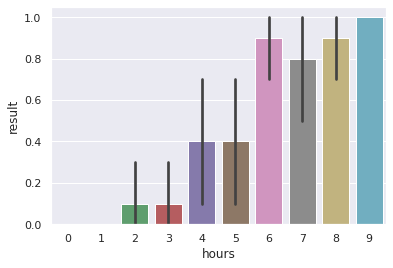

In [9]:
# 공부시간과 합격률의 관계를 그래프로
# 가로축에 공부시간, 세로축에 합격률 지정 막대그래프
sns.barplot(x='hours', y='result', data=test_result)

# 공부시간마다의 합격률 계산
print('공부시간 마다의 합격률 계산\n', test_result.groupby('hours').mean())

### 6.3.11 로지스틱회귀 (실습)

In [10]:
mod_glm = smf.glm(formula = 'result ~ hours', data=test_result, family=sm.families.Binomial()).fit()

(로지스틱 회귀와는 상관없이) 일반선형모델을 추정하는 경우에는 `smf.glm` 함수를 사용

- family : 확률분포지정. `sm.families.Binomial()` 은 이항분포 지정
- 푸아송분포 지정 방법 : `sm.families.Poission()`
- 이항분포를 지정하면 링크함수는 디폴트로 로짓함수
- 푸아송분포를 지정하면 링크함수는 디폴트로 로그함수
- 링크함수 강제 지정 방법 : `sm.families.Binomial(link = sm.families.links.logit)` 이라고 명시적으로 **로짓함수** 지정 가능

### 6.3.12 로지스틱 회귀 결과의 출력

In [11]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 12 Jan 2023   Deviance:                       68.028
Time:                        13:55:30   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

- Method : IRLS (반복적인 최소제곱법의 약자; Iterative Reweighted Least Squares )
- No.Iterations : 내부에서 계산한 반복수
- 계수에 대해서는 t검정 대신 Wald 검정 결과가 출력되고 있음
- 공부시간 계수는 양수임

### 6.3.13 모델 선택

In [13]:
# Null 모델 추정
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
mod_glm_null = smf.glm('result ~ 1', data=test_result,
                       family=sm.families.Binomial()).fit()

# AIC 비교
print('Null 모델:', mod_glm_null.aic.round(3))
print('변수가 있는 모델:', mod_glm.aic.round(3))

Null 모델: 139.989
변수가 있는 모델: 72.028


위 두 모델의 AIC 비교 결과 공부시간을 독립변수로 이용한 모델의 AIC가 더 작음.

공부시간이라는 변수는 합격률을 예측하는데 도움이 된다는 것임.

### 6.3.14 로지스틱 회귀곡선 그래프

로지스틱 회귀로 구할 수 있었던 이론상의 합격률을 그래프로 나타내 보겠음.

- 가로축 : 공부시간
- 세로축 : 합격 여부의 이항확률변수를 지정한 산포도를 그리고, 이론상의 합격률을 겹치겠음

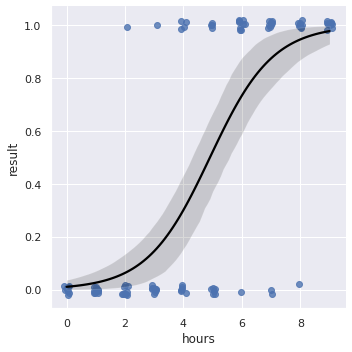

In [18]:
sns.lmplot(x='hours', y='result',
           data=test_result,
           logistic=True,
        #    scatter_kws={'color':'gray'},
           line_kws={'color':'black'},
           x_jitter=0.1, y_jitter=0.02)
# x_jitter, y_jitter : 산포도가 그리는 데이터의 점을 조금 위아래로 흩어지게 하는 설정
# 그렇지 않으면 겹쳐져서 얼마나 있는지 잘 구분이 안감

### 6.3.15 성공확률 예측

In [19]:
# 합격률을 수치로 얻을 수도 있음
exp_val = pd.DataFrame({'hours':np.arange(0, 10, 1)})

# 공부시간에 따른 합격확률 예측치
pred = mod_glm.predict(exp_val)
pred
# 0 시간이면 1%, 9시간이면 97.8% 의 이론상 합격률

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 6.3.16 용어설명 

**오즈(Odds)**

오즈는 실패하는 것보다 성공하는 것이 몇배 더 쉬운가를 나타내는 것. p는 성공확률

$Odds = \dfrac {p} {1-p}$

p=0.5 일 때 오즈는 1이 되어 성공과 실패의 쉬움이 변하지 않음.

p=0.75 일때 오즈는 3이 되어 성공이 실패보다 3배 쉬워짐


**오즈비(odd ratio)**

오즈 간에 비율을 취한것을 **오즈비**라고 부름.

오즈비에 로그를 취한것을 로그오즈비라고 부름.

## 6.4 일반선형모델의 평가

정규선형모델에서 모델을 평가할 때 **잔차**의 체크는 필수

In [22]:
# 데이터 다시 읽기
test_result = pd.read_csv(PATH + '6-3-1-logistic-regression.csv')

# modeling
mod_glm = smf.glm('result ~ hours', data=test_result,
                  family=sm.families.Binomial()).fit()

### 6.4.2 피어슨 잔차 (Pearson)

피어슨 잔차는 다음과 같이 계산 가능
$Pearson residuals = \dfrac {y - N\hat{p}} {\sqrt{N\hat{p}(1-\hat{p})}}$

- N : 시행횟수
- hat p : 추측한 성공확률 (즉, mod_glm.predict())


위 식에서 예측결과의 시행횟수는 당연히 1이 되기 때문에 피어슨 잔차는 실질적으로 다음과 같이 계산됨

$Pearson residuals = \dfrac {y - N\hat{p}} {\sqrt{\hat{p}(1-\hat{p})}}$

### 6.4.3 피어슨 잔차의 해석 

피어슨 잔차의 분모는 이항분포의 분산의 값과 일치

그 값에 루트를 취한 것이므로 분모는 이항분포의 표준편차로 볼 수 있음.

정규선형모델에서는 종속변수와 predict() 함수로 구한 예측값의 차이를 잔차로 사용했습니다. y - hat p을 잔차로 사용하는 느낌입니다. 

피어슨 잔차는 일반 잔차를 분포의 표준편차로 나눈것으로 해석할 수 있음


피어슨 잔차의 제곱합은 **피어슨 카이제곱통계량** 이라고도 부르며, 모델 적합도의 지표가 됨.

### 6.4.4 피어슨 잔차 (실습)

In [28]:
# 예측한 성공확률
pred = mod_glm.predict()
print('공부시간별 예측 합격 확률:', pred)

# 종속변수 (시험합격여부)
y = test_result.result

# 피어슨 잔차
pearson_resid = (y - pred) / np.sqrt(pred * (1 - pred))
display(pearson_resid.head(3))

# 피어슨 잔차제곱합은 피어슨 카이제곱통계량이 됨
print('피어슨 카이제곱통계량:', np.sum(mod_glm.resid_pearson ** 2))

# 위 결과는 summary()에도 출력되며 아래와 같이도 꺼낼 수 있음
print('피어슨 카이제곱 통계량 다른 방법:', mod_glm.pearson_chi2)
print('summary() 의 Pearson chi2 에도 값이 나타남')
display(mod_glm.summary())

공부시간별 예측 합격 확률: [0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.026 0.026
 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.063 0.063 0.063 0.063
 0.063 0.063 0.063 0.063 0.063 0.063 0.145 0.145 0.145 0.145 0.145 0.145
 0.145 0.145 0.145 0.145 0.301 0.301 0.301 0.301 0.301 0.301 0.301 0.301
 0.301 0.301 0.521 0.521 0.521 0.521 0.521 0.521 0.521 0.521 0.521 0.521
 0.734 0.734 0.734 0.734 0.734 0.734 0.734 0.734 0.734 0.734 0.875 0.875
 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.946 0.946 0.946 0.946
 0.946 0.946 0.946 0.946 0.946 0.946 0.978 0.978 0.978 0.978 0.978 0.978
 0.978 0.978 0.978 0.978]


0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

피어슨 카이제곱통계량: 84.91138782569973
피어슨 카이제곱 통계량 다른 방법: 84.91138782569973
summary() 의 Pearson chi2 에도 값이 나타남


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 12 Jan 2023   Deviance:                       68.028
Time:                        14:30:02   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 6.4.8 deviance 잔차

In [32]:
# deviance 잔차 직적 확인
print('deviance 잔차')
display(mod_glm.resid_deviance.head(5))

# deviance 잔차 제곱합은 deviance 가 됨
print('\n\ndeviance 잔차 제곱합은 deviance가 됨 :', np.sum(mod_glm.resid_deviance ** 2))

print('\n\nsummary()에서도 deviance 확인 가능')
display(mod_glm.summary())

deviance 잔차


0   -0.144369
1   -0.144369
2   -0.144369
3   -0.144369
4   -0.144369
dtype: float64



deviance 잔차 제곱합은 deviance가 됨 : 68.02788118117269


summary()에서도 deviance 확인 가능


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 12 Jan 2023   Deviance:                       68.028
Time:                        14:35:32   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

## 6.5 푸아송 회귀

**푸아송 회귀**란 확률분포에 푸아송 분포를 사용하고, 링크함수에 로그함수를 사용한 일반선형모델임.

독립변수는 여러개 상관없고, 연속형과 카테고리형이 혼재되어 있어도 됨.

### 6.5.4 푸아송 회귀 (실습) 

In [35]:
beer = pd.read_csv(PATH+'6-5-1-poisson-regression.csv')
beer.head(3)

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0


In [36]:
mod_pois = smf.glm('beer_number ~ temperature', beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Thu, 12 Jan 2023   Deviance:                       5.1373
Time:                        14:44:03   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

- 기온 계수(coef) 는 양의 값.

기온이 오르면 맥주 판매 개수도 늘어날 것

### 6.5.5 모델선택 

In [37]:
mod_pois_null = smf.glm('beer_number ~ 1', beer, family=sm.families.Poisson()).fit()

print('Null 모델 AIC:', mod_pois_null.aic.round(3))
print('변수가 있는 모델 AIC:', mod_pois.aic.round(3))

Null 모델 AIC: 223.363
변수가 있는 모델 AIC: 119.343


### 6.5.6 회귀곡선 그래프 

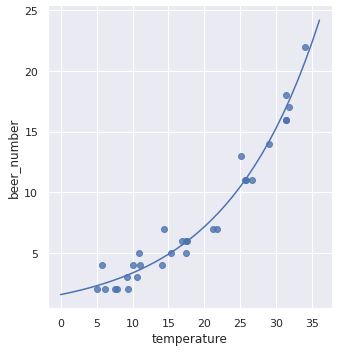

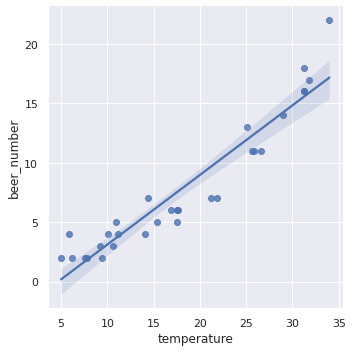

In [45]:
# 예측값 작성
x_plot = np.arange(0, 37, 1)
pred = mod_pois.predict(pd.DataFrame({'temperature':x_plot}))

# 회귀곡선을 그리지 않는 lmplot
# fit_reg : True 인 경우 line 및 오차(?) 표시
sns.lmplot(y='beer_number', x='temperature', data=beer, fit_reg=False)

# 회귀곡선을 덧 그리기
plt.plot(x_plot, pred)


sns.lmplot(y='beer_number', x='temperature', data=beer, fit_reg=True)

### 6.5.7 회귀계수 해석 

로그의 특징으로서 덧셈이 곱셈이 된다는 점에 주의할 필요가 있음

일반적인 모델에서는 기온이 1도 오르면 맥주 매출이 X원 증가한다는 해석이 되지만, 

로그함수를 사용하면 기온이 1도 오르면, 맥주 판매 개수가 Y배가 된다는 해석이 됨.

In [47]:
# 기온이 1도일 때의 판매 개수의 기댓값
exp_val_1 = pd.DataFrame({'temperature':[1]})
pred_1 = mod_pois.predict(exp_val_1)

# 기온이 2도일 때의 판매 개수의 기댓값
exp_val_2 = pd.DataFrame({'temperature':[2]})
pred_2 = mod_pois.predict(exp_val_2)

# 기온이 1도에서 2도로 1도 오르면 판매 개수는 몇배가 되는지
print('기온이 1도에서 1도 올라 2도가 되었을 때 판매개수는 몇배?:', pred_2 / pred_1)

# 위 결과는 회귀계수에 exp를 취한 값과 동일
np.exp(mod_pois.params['temperature'])

기온이 1도에서 1도 올라 2도가 되었을 때 판매개수는 몇배?: 0    1.079045
dtype: float64


1.079045054586893